# Assignment 1 Brief 

## Deadline: Tuesday, October 29, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 1 to 5

### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_1_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to express an objective function and its gradients in matrix form.

* Being able to use numpy and pandas to preprocess a dataset.

* Being able to use numpy to build a machine learning pipeline for supervised learning. 


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# Regularisation for Linear Regression

Regularisation is a technique commonly used in Machine Learning to prevent overfitting. It consists on adding terms to the objective function such that the optimisation procedure avoids solutions that just learn the training data. Popular techniques for regularisation in Supervised Learning include Lasso Regression, Ridge Regression and the Elastic Net. 

In this Assignment, you will be looking at Ridge Regression and devising equations to optimise the objective function in Ridge Regression using two methods: a closed-form derivation and the update rules for stochastic gradient descent. You will then use those update rules for making predictions on a Air Quaility dataset.

## Ridge Regression

Let us start with a data set for training $\mathcal{D} = \{\mathbf{y}, \mathbf{X}\}$, where the vector $\mathbf{y}=[y_1, \cdots, y_n]^{\top}$ and $\mathbf{X}$ is the design matrix from Lab 3, this is, 

\begin{align*}
    \mathbf{X} = 
                \begin{bmatrix}
                        1 & x_{1,1} & \cdots & x_{1, D}\\
                        1 & x_{2,1} & \cdots & x_{2, D}\\
                   \vdots &  \vdots\\
                        1 & x_{n,1} & \cdots & x_{n, D}
                \end{bmatrix}
               = 
               \begin{bmatrix}
                      \mathbf{x}_1^{\top}\\
                       \mathbf{x}_2^{\top}\\
                          \vdots\\
                        \mathbf{x}_n^{\top}
                \end{bmatrix}.
\end{align*}

Our predictive model is going to be a linear model

$$ f(\mathbf{x}_i) = \mathbf{w}^{\top}\mathbf{x}_i,$$

where $\mathbf{w} = [w_0\; w_1\; \cdots \; w_D]^{\top}$.

The **objetive function** we are going to use has the following form

$$ J(\mathbf{w}, \alpha) = \frac{1}{n}\sum_{i=1}^n (y_i - f(\mathbf{x}_i))^2 + \frac{\alpha}{2}\sum_{j=0}^D w_j^2,$$

where $\alpha>0$ is known as the *regularisation* parameter.

The first term on the right-hand side (rhs) of the expression for $J(\mathbf{w}, \alpha)$ is very similar to the least-squares objective function we have seen before, for example in Lab 3. The only difference is on the term $\frac{1}{n}$ that we use to normalise the objective with respect to the number of observations in the dataset. 

The first term on the rhs is what we call the "fitting" term whereas the second term in the expression is the regularisation term. Given $\alpha$, the two terms in the expression have different purposes. The first term is looking for a value of $\mathbf{w}$ that leads the squared-errors to zero. While doing this, $\mathbf{w}$ can take any value and lead to a solution that it is only good for the training data but perhaps not for the test data. The second term is regularising the behavior of the first term by driving the $\mathbf{w}$ towards zero. By doing this, it restricts the possible set of values that $\mathbf{w}$ might take according to the first term. The value that we use for $\alpha$ will allow a compromise between a value of $\mathbf{w}$ that exactly fits the data (first term) or a value of $\mathbf{w}$ that does not grow too much (second term).

This type of regularisation has different names: ridge regression, Tikhonov regularisation or $\ell_2$ norm regularisation. 

### Question 1: $J(\mathbf{w}, \alpha)$ in matrix form (2 marks)

Write the expression for $J(\mathbf{w}, \alpha)$ in matrix form. Include ALL the steps necessary to reach the expression.

#### Question 1 Answer
First we can re-write the $f(\mathbf{x}_i)$ fucntion as a matrix multipltication to represent multiple inner proucts between individual input vecotrs and parameters:

$$
f(x_i) = \mathbf{w}^\top x_i = (\mathbf{w}^\top x_i)^\top = x^\top_i\mathbf{w}
$$

$$
\mathbf{f} = \begin{bmatrix}f(x_1)\\f(x_2)\\ \vdots \\ f(x_n)\end{bmatrix}.
$$

$$
\mathbf{f} = \mathbf{Xw}
$$

Using the following identity:
$$
a = \sum_{i=1}^{k} b^2_i = \mathbf{b}^\top\mathbf{b},
$$

we can derive:

$$
J(\mathbf{w}, \alpha) = \frac{1}{N}(\mathbf{y} - \mathbf{f})^\top(\mathbf{y} - \mathbf{f}) + \frac{\alpha}{2}(\mathbf{w^\top w})
$$

$$
J(\mathbf{w}, \alpha) = \frac{1}{N}(\mathbf{y} - \mathbf{Xw})^\top(\mathbf{y} - \mathbf{Xw}) + \frac{\alpha}{2}(\mathbf{w^\top w})
$$

## Optimising the objective function with respect to $\mathbf{w}$

There are two ways we can optimise the objective function with respect to $\mathbf{w}$. The first one leads to a closed form expression for $\mathbf{w}$ and the second one using an iterative optimisation procedure that updates the value of $\mathbf{w}$ at each iteration by using the gradient of the objective function with respect to $\mathbf{w}$,
$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}},
$$
where $\eta$ is the *learning rate* parameter and $\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}}$ is the gradient of the objective function.

### Question 2: Derivative of $J(\mathbf{w}, \alpha)$ wrt $\mathbf{w}$ (2 marks)

Find the closed-form expression for $\mathbf{w}$ by taking the derivative of $J(\mathbf{w}, \alpha)$ with respect to 
$\mathbf{w}$, equating to zero and solving for $\mathbf{w}$. Write the expression in matrix form. 

Also, write down the specific update rule for $\mathbf{w}_{\text{new}}$ by using the equation above.

#### Question 2 Answer

First we multiply out the brackets using the following identity:

$$
(\mathbf{a} - \mathbf{b})^\top (\mathbf{c} - \mathbf{d}) = \mathbf{a}^\top \mathbf{c} - \mathbf{a}^\top \mathbf{d} - \mathbf{b}^\top \mathbf{c} + \mathbf{b}^\top \mathbf{d}
$$

where $\mathbf{a} = \mathbf{c} = \mathbf{y}$ and $\mathbf{b}=\mathbf{d} = \mathbf{X}\mathbf{w}$

$$
(\mathbf{y} - \mathbf{Xw})^\top(\mathbf{y} - \mathbf{Xw}) = \mathbf{y}^\top\mathbf{y} - 2\mathbf{y}^\top\mathbf{X}\mathbf{w} + \mathbf{w}^\top\mathbf{X}^\top\mathbf{X}\mathbf{w}
$$

Thus:

$$
J(\mathbf{w}, \alpha) = \frac{1}{N}(\mathbf{y}^\top\mathbf{y} - 2\mathbf{y}^\top\mathbf{X}\mathbf{w} + \mathbf{w}^\top\mathbf{X}^\top\mathbf{X}\mathbf{w}) + \frac{\alpha}{2}(\mathbf{w^\top w})
$$

Now we can differentate two terms on the right hand side seperately using the following identities:

$$
\frac{d(w^\top x)}{dw} = x | \frac{d(x^\top w)}{dw} = x | \frac{d(w^\top w)}{dw} = 2w | \frac{d(w^\top Cw)}{dw} = 2Cw
$$

And knowing that $\mathbf{X^\top X}$ is symmetric, we get:

$$
\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}} = \frac{1}{N}(-2\mathbf{X^\top y} + 2\mathbf{X^\top Xw}) + \frac{\alpha}{2}(2\mathbf{w})
$$

Rearanging and simplifying:

$$
\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}} = \frac{2}{N}(\mathbf{X^\top Xw} - \mathbf{X^\top y}) + \alpha\mathbf{w}
$$

Thus specific update rule for $\mathbf{w}_{\text{new}}$ would be:

$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta(\frac{2}{N}(\mathbf{X^\top Xw_{\text{old}}} - \mathbf{X^\top y}) + \alpha\mathbf{w_{\text{old}}})
$$

As for the closed form expression we equate the derived gradient to 0 and rearange for $\mathbf{w}$:

$$
\frac{2}{N}(\mathbf{X^\top Xw} - \mathbf{X^\top y}) + \alpha\mathbf{w} = 0
$$

$$
\frac{2}{N}(\mathbf{X^\top Xw}) - \frac{2}{N}(\mathbf{X^\top y}) + \alpha\mathbf{w} = 0
$$

$$
\mathbf{X^\top Xw} - \mathbf{X^\top y} + \frac{N\alpha}{2}\mathbf{w} = 0
$$

$$
\mathbf{X^\top Xw} + \frac{N\alpha}{2}\mathbf{w} = \mathbf{X^\top y}
$$

$$
(\mathbf{X^\top X} + \frac{N\alpha}{2}\mathbf{I})\mathbf{w} = \mathbf{X^\top y}
$$

Thus:
$$
\mathbf{w^*} = (\mathbf{X^\top X} + \frac{N\alpha}{2}\mathbf{I})^{-1}\mathbf{X^\top y}
$$

# Using ridge regression to predict air quality

Our dataset comes from a popular machine learning repository that hosts open source datasets for educational and research purposes, the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We are going to use ridge regression for predicting air quality. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Air+Quality).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pods
pods.util.download_url('https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip')
import zipfile
zip = zipfile.ZipFile('./AirQualityUCI.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

[===========================   ]   1.328/1.472MB

[==============================]   1.472/1.472MB                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                


In [3]:
# The .csv version of the file has some typing issues, so we use the excel version
air_quality = pd.read_excel('./AirQualityUCI.xlsx', usecols=range(2,15))

We can see some of the rows in the dataset 

In [4]:
air_quality.sample(5)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
3702,1.6,1053.0,-200,7.886653,894.50,58.0,744.75,46.0,1726.50,882.00,27.300,57.775000,2.064634
4133,-200.0,1160.5,-200,12.214164,1057.00,-200.0,613.00,-200.0,1764.00,1026.00,25.125,51.525000,1.620955
21,2.2,1310.0,79,8.826223,932.50,184.0,1081.75,126.0,1646.50,946.25,8.325,79.799999,0.877784
7603,5.0,1516.5,-200,23.959596,1402.50,827.1,451.00,197.8,1578.50,2194.75,11.100,51.449999,0.679006
2484,0.9,889.5,-200,6.412912,830.75,93.0,922.00,67.0,1594.25,825.75,17.750,56.500000,1.137511


The target variable corresponds to the CO(GT) variable of the first column. The following columns correspond to the variables in the feature vectors, *e.g.*, PT08.S1(CO) is $x_1$ up until AH which is $x_D$. The original dataset also has a date and a time columns that we are not going to use in this assignment.

Before designing our predictive model, we need to think about three stages: the preprocessing stage, the training stage and the validation stage. The three stages are interconnected and *it is important to remember that the testing data that we use for validation has to be set aside before preprocessing*. Any preprocessing that you do has to be done only on the training data and several key statistics need to be saved for the test stage.

Separating the dataset into training and test before any preprocessing has happened help us to recreate the real world scenario where we will deploy our system and for which the data will come without any preprocessing.

We are going to use *hold-out validation* for testing our predictive model so we need to separate the dataset into a training set and a test set.

### Question 3: Splitting the dataset (1 mark)

Split the dataset into a training set and a test set. The training set should have 70% of the total observations and the test set, the 30%. For making the random selection make sure that you use a random seed that corresponds to the last five digits of your student UCard. Make sure that you comment your code.

#### Question 3 Answer

In [5]:
def train_test_split(data, labels=None, random_state=52997, train_size=0.7):
    """ Split data into a training and test set

    Parameters
    ----------
    data
        The pd.DataFrame object to be split
    labels
        Optional parameter to split the labels if passed
    random_state
        Randomizes splitting, set to last 5 numbers on Ucard by default
    train_size
        Proportion of data for training set, 70% by default

    Returns
    -------
    train, test
        Return just train and test set if labels were not provided
        
    train, test, y_train, y_test
        Also return labels for train and test set if provided.

    """
    
    # Sample 70% of the data:
    train = data.sample(frac=train_size, random_state=random_state)
    
    # Delete the train data form original DataFrame:
    test = data.drop(train.index)
    
    if labels is None:
        return train, test
    else:
        y_train, y_test = y.loc[train.index], labels.loc[test.index]
        return train, test, y_train, y_test

In [6]:
train, test = train_test_split(air_quality)

## Preprocessing the data

The dataset has missing values tagged with a -200 value. Before doing any work with the training data, we want to make sure that we deal properly with the missing values. 

### Question 4: Missing values (3 marks)

Make some exploratory analysis on the number of missing values per column in the training data. 

* Remove the rows for which the target feature has missing values. We are doing supervised learning so we need all our data observations to have known target values.

* Remove features with more than 20% of missing values. For all the other features with missing values, use the mean value of the non-missing values for imputation.

#### Question 4 Answer

In [7]:
def preprocess(data, features=None, fill=None):
    """ Function for preprocessing the data.

    Parameters
    ----------
    data
        The pd.DataFrame object to be preprocessed
        Has to contain 'CO(GT)' as one of the columns
    features
        Optional parameter denoting which features to keep
        If not provided features with over 20% missing values are droped

    Returns
    -------
    data
        Preprocessed pd.DataFrame object

    """

    # Replace the -200 values with NaNs:
    data.where(data != -200, inplace=True)

    # Remove the rows with missing values in target column:
    data.dropna(subset=['CO(GT)'], inplace=True)

    # Remove the features with more than 20% missing values:
    if features is None:
        data.dropna(axis=1, thresh=(data.shape[0]*0.8), inplace=True)
    else:
        data = data[features]

    # Fill missing values:
    if fill is None:
        data.fillna(data.mean(), inplace=True)
    else:
        data.fillna(fill, inplace=True)
    
    return data

In [8]:
train = preprocess(train)

### Question 5: Normalising the training data (2 marks)

Now that you have removed the missing data, we need to normalise the input vectors. 

* Explain in a sentence why do you need to normalise the input features for this dataset.

* Normalise the training data by substracting the mean value for each feature and dividing the result by the standard deviation of each feature. Keep the mean values and standard deviations, you will need them at test time.

#### Question 5 Answer

Makes training less sensative to the scale of features and stabilizes the regularization. 


In [19]:
# Makes sense to split data here since we only have to normalise the input data.
y = train['CO(GT)']
X = train.drop(['CO(GT)'], axis=1)

# Normalise the input features:
train_mean = X.mean()
train_std = X.std()
X_norm_1 = (X - train_mean)/train_std

X_norm = np.empty(X.shape)
for i in range(X.shape[1]):
    X_norm[:, i] = (X_norm[:, i] - train_mean[i])/train_std[i] 
    

In [21]:
print(train_mean.values)
print(train_std.values)
X_norm

[1.11210432e+03 1.03230852e+01 9.48855924e+02 2.57872006e+02
 8.26943338e+02 1.14945219e+02 1.44454942e+03 1.05034943e+03
 1.76404829e+01 4.92440213e+01 9.85834018e-01]
[2.14718531e+02 7.26477585e+00 2.59757660e+02 2.12882143e+02
 2.53762733e+02 4.73058636e+01 3.41802289e+02 4.00211168e+02
 8.63732418e+00 1.70366159e+01 3.90495687e-01]


array([[  -5.15422975,   11.71028481,   -3.6528506 , ...,  -25.58602627,
          -4.90698047,  422.30900634],
       [  -5.53728937,  -39.87423858,   -3.83515252, ...,   37.02016851,
         -12.88978648, -281.92412425],
       [  -5.61529847,   10.50584297,   -2.98243464, ...,   37.65693979,
          -8.44348093,  948.56321847],
       ...,
       [  -5.1798895 ,   -1.42097779,   -3.65193715, ...,   -2.05660936,
          -2.88948137,   -1.96571906],
       [  -5.17676647,   -1.39040624,   -3.65379251, ...,   -2.08125713,
          -2.89048139,   -2.85167146],
       [  -5.18036631,   -1.50059734,   -3.65301557, ...,   -2.10055313,
          -2.9326304 ,   -3.60723974]])

## Training and validation stages

We have now curated our training data by removing data observations and features with a large amount of missing values. We have also normalised the feature vectors. We are now in a good position to work on developing the prediction model and validating it. We will use both the closed form expression for $\mathbf{w}$ and gradient descent for iterative optimisation. 

We first organise the dataframe into the vector of targets $\mathbf{y}$ and the design matrix $\mathbf{X}$.

In [10]:
# Write your code here to get y and X
y = y
X['Eins'] = 1

### Question 6: training with closed form expression for $\mathbf{w}$ (3 marks)

To find the optimal value of $\mathbf{w}$ using the closed form expression that you derived before, we need to know the value of the regularisation parameter $\alpha$ in advance. We will determine the value by using part of the training data for finding the parameters $\mathbf{w}$ and another part of the training data to choose the best $\alpha$ from a set of predefined values.

* Use `np.logspace(start, stop, num)` to create a set of values for $\alpha$ in log scale. Use the following parameters `start=-3`, `stop=2` and `num=20`. 

* Randomly split the training data into what is properly called the training set and the validation set. As before, make sure that you use a random seed that corresponds to the last five digits of your student UCard. Use 70% of the data for the training set and 30% of the data for the validation set.

* For each value that you have for $\alpha$ from the previous step, use the training set to compute $\mathbf{w}$ and then measure the mean-squared error (MSE) over the validation data. After this, you will have `num=20` MSE values. Choose the value of $\alpha$ that leads to the lower MSE and save it. You will use it at the test stage.

* What was the best value of $\alpha$? Is there any explanation for that?

#### Question 6 Answer

In [11]:
def closed_form(X, y, alpha):
    """ Calculates closed form solution.

    Parameters
    ----------
    X
        Input features
    y
        Output labels
    alpha
        Regularization parameter

    Returns
    -------
    w
        Optimal value w*

    """
    
    N, n_features = X.shape
    linear1 = ((X.T @ X) + (((N * alpha) / 2) * np.eye(n_features)))
    linear2 = X.T @ y 
    w = np.linalg.solve(linear1, linear2)
    
    return w

In [12]:
def compute_mse(actual, pred):
    """ Calculates mean squared error.

    Parameters
    ----------
    actual
        Output labels
    pred
        Preidctions made by the model

    Returns
    -------
    mse
        Mean Square Error of predictions

    """
    
    mse = np.mean(np.square(actual - pred))
    return mse

In [13]:
def optimal_alpha(X, y):
    
    alpha_range = np.logspace(-3, 2, 100)

    # Split data into train and validation
    X_train, X_val, y_train, y_val = train_test_split(X, labels=y)

    val_errors = []
    for alpha in alpha_range:
        w = closed_form(X_train, y_train, alpha)
        
        val_pred = X_val @ w
        val_mse = compute_mse(y_val, val_pred)
        val_errors.append(val_mse)
         
    # Plot error vs alpha:
    fig, ax = plt.subplots(2)
    
    for i in range(len(ax)):
        ax[i].plot(alpha_range, val_errors)
        ax[i].set_xlabel('Alpha')
        ax[i].set_ylabel('Error (mse)')     
    ax[0].set_title('Error vs Alpha')
    ax[1].set(xlim=(0, 0.1), ylim=(0.23, 0.24)) # Scaled plot
    
    return alpha_range[np.argmin(val_errors)]

Optimal alpha is 0.029


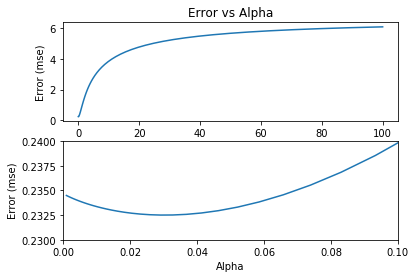

In [14]:
opt_alpha = optimal_alpha(X, y)
print(f'Optimal alpha is {opt_alpha:.2}')

As alpha increases the error becomes larger tending towards similar values as if the parameters were initialised randomly. This is caused by unstable update of the parameters due to regularazation becoming dominant value. So alpha has to be small to ensure the parameters are not over regularized but it has to be over 0 to limit the complexity of the model to an extent.

### Question 7: validation with the closed form expression for $\mathbf{w}$ (2 marks)

We are going to deal now with the test data to perform the validation of the model. Remember that the test data might also contain missing values in the target variable and in the input features.

* Remove the rows of the test data for which the labels have missing values. 
* If you remove any feature at the training stage, you also need to remove the same features from the test stage.
* Replace the missing values on each feature variables with the mean value you computed in the training data.
* Normalise the test data using the means and standard deviations computed from the training data
* Compute again $\mathbf{w}$ for the value of $\alpha$ that best performed on the validation set using ALL the training data (not all the training set).
* Report the MSE on the preprocessed test data and an histogram with the absolute error.
* Does the regularisation have any effect on the model? Explain your answer.

#### Question 7 Answer

In [15]:
def validate_model(test_data, train, w, display=False):
    """ Function for validating the model. 
    Preprocessed the training data and makes predictions
    Then calculates mse and absolute error and displays results

    Parameters
    ----------
    test_data
        Unprocessed test data passed as pd.DataFrame
    train
        Processed train data (pd.DataFrame)
    w
        Parameter values calculated durning training
    display
        If set to True will plot absolute error histogram
    """
    
    # Preprocess and Normalise the test data:
    test_data = preprocess(test_data, features=train.columns, fill=train.mean())
    y_test = test_data['CO(GT)']
    X_test = test_data.drop(['CO(GT)'], axis=1)
    X_test = (X_test - train_mean) / train_std
    X_test['Eins'] = 1
    
    # Make predictions and compute mse error:
    pred = X_test @ w
    mse = compute_mse(y_test, pred)
    print(f'Mean squared error for the test data is {mse:.4}')
    
    # Compute and plot the absoulte error:
    abs_error = np.abs(y_test - pred)
    mae = abs_error.sum()/abs_error.shape[0]
    print(f'Mean absolute error for the test data is {mae:.4}')
    
    if display:
        abs_error.hist(bins=100)
        plt.title('Absolute Error Histogram')
        plt.xlabel('Error (absolute)')
        plt.ylabel('N of Occurences')

/Users/Lucker/anaconda3/envs/mlai/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Mean squared error for the test data is 0.2195
Mean absolute error for the test data is 0.3047


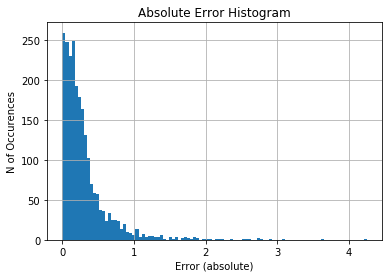

In [16]:
# Validation with optimal alpha calculated above
w_closed = closed_form(X, y, opt_alpha) 
validate_model(test, train, w_closed, display=True)

In [17]:
# Validation with alpha set to 0 (i.e. no regularization)
w = closed_form(X, y, 0)
validate_model(test, train, w)

Mean squared error for the test data is 0.2194
Mean absolute error for the test data is 0.3028


In theory regularization does have an effect on the model, limiting its complexity which allows for a greater generalisation. However, results above suggest that regularization does not improve the performance of the model on testing set. The difference however is so small that could be attributed to statistical noise or it could imply that regularisation is not effective for computing the optimal parameter directly trough the closed form expression.

## Question 8: training with gradient descent and validation (5 marks)


Use gradient descent to iteratively compute the value of $\mathbf{w}_{\text{new}}$. Instead of using all the training set to compute the gradient, use a subset of $B$ datapoints in the training set. This is sometimes called minibatch gradient descent where $B$ is the size of the minibacth. When using gradient descent with minibatches, you need to find the best values for three parameters: $\eta$, the learning rate, $B$, the number of datapoints in the minibatch and $\alpha$, the regularisation parameter.

* As you did on Question 6, create a grid of values for the parameters $\alpha$ and $\eta$ using `np.logspace` and a grid of values for $B$ using np.linspace. Because you need to find 
 three parameters, start with `num=5` and see if you can increase it.

* Use the same training set and validation set that you used in Question 6.

* For each value that you have of $\alpha$, $\eta$ and $B$ from the previous step, use the training set to compute $\mathbf{w}$ using minibatch gradient descent and then measure the MSE over the validation data. For the minibatch gradient descent choose to stop the iterative procedure after $500$ iterations.

* Choose the values of $\alpha$, $\eta$ and $B$ that lead to the lower MSE and save them. You will use them at the test stage.

*3 marks of out of the 5 marks*


* Use the test set from Question 7 and provide the MSE obtained by having used minibatch training with the best values for $\alpha$, $\eta$ and $B$ over the WHOLE training data (not only the training set).

* Compare the performance of the closed form solution and the minibatch solution. Are the performances similar? Are the parameters $\mathbf{w}$ and $\alpha$ similar in both approaches? Please comment on both questions.

*2 marks of out of the 5 marks*

#### Question 8 Answer

In [18]:
def compute_gradient(X, y, w, alpha):
    """ Calculate the gradient using equation derived above

    Parameters
    ----------
    X
        Input features
    y
        Output labels
    w 
        parameter values
    alpha
        regularization parameter
    
    Return
    ------
    dw
        gradient for upading parameters
    """
    
    N = X.shape[0]
    dw = (2 / N) * ((X.T @ X @ w) - (X.T @ y)) + (alpha * w)
    
    return dw

In [19]:
def MBGD(X, y, lr=0.001, alpha=0.01, batch_size=32, epochs=500, train_size=0.7):
    
    X_train, X_val, y_train, y_val = train_test_split(X, labels=y, train_size=train_size)
    N, n_features = X_train.shape
     
    np.random.seed(52997) # Ensures weights are always initialised to same values
    w = np.random.uniform(-0.01, 0.01, size=(n_features))
    
    val_errors = []
    for epoch in range(epochs):
        
        # Shuffle the data using the random sample method in train_test_split
        shuff_X, _, shuff_y, _ = train_test_split(X_train, labels=y_train, train_size=1, random_state=epoch)
        
        # Split the data into minibatches
        split_X = np.array_split(shuff_X.values, int(N/batch_size))
        split_y = np.array_split(shuff_y.values, int(N/batch_size))
        
        for i in range(len(split_X)):   
            X_i, y_i = split_X[i], split_y[i]
            dw = compute_gradient(X_i, y_i, w, alpha)
            w -= (lr * dw)
        
        # Compute valuation error if not full training set is used
        if train_size < 1:
            val_pred = X_val @ w
            val_error = compute_mse(y_val, val_pred)
            val_errors.append(val_error)
                
    return w, val_errors

In [20]:
def optimize_mbgd(X, y):
    
    lr_range = np.logspace(-3, -2, 10)
    alpha_range = np.logspace(-3, -1, 10)
    batch_range = np.power(2, range(5,10))
    
    min_error = 1
    for lr in lr_range:
        for alpha in alpha_range:
            for batch in batch_range:
                    w, errors = MBGD(X, y, lr=lr, alpha=alpha, batch_size=batch)
                    last_error = errors[-1]
                    if last_error < min_error:
                        print(f'New minimal error: {last_error:.4}. Improved by {(min_error - last_error):.4}')
                        min_error = last_error
                        pars = dict(lr=lr, alpha=alpha, batch_size=batch)
                        print(f'With following parameters: {pars}')
    return pars

opt_pars = optimize_mbgd(X, y)

New minimal error: 0.2348. Improved by 0.7652
With following parameters: {'lr': 0.001, 'alpha': 0.001, 'batch_size': 32}
New minimal error: 0.2346. Improved by 0.0001834
With following parameters: {'lr': 0.001, 'alpha': 0.001, 'batch_size': 64}
New minimal error: 0.2336. Improved by 0.001005
With following parameters: {'lr': 0.001, 'alpha': 0.001, 'batch_size': 128}
New minimal error: 0.232. Improved by 0.001554
With following parameters: {'lr': 0.001, 'alpha': 0.001, 'batch_size': 256}
New minimal error: 0.2315. Improved by 0.0004954
With following parameters: {'lr': 0.001, 'alpha': 0.001, 'batch_size': 512}
New minimal error: 0.2315. Improved by 6.721e-06
With following parameters: {'lr': 0.001, 'alpha': 0.0016681005372000592, 'batch_size': 512}
New minimal error: 0.2315. Improved by 8.699e-06
With following parameters: {'lr': 0.001, 'alpha': 0.0027825594022071257, 'batch_size': 512}
New minimal error: 0.2315. Improved by 7.547e-06
With following parameters: {'lr': 0.001, 'alpha': 0.

KeyboardInterrupt: 

Mean squared error for the test data is 0.2189
Mean absolute error for the test data is 0.3033

Mean value for the minibatch parameters is 0.2987 and for closed form is 0.2986
The optimal alpha parameter for the minibatch is 0.008 and for closed form is 0.029


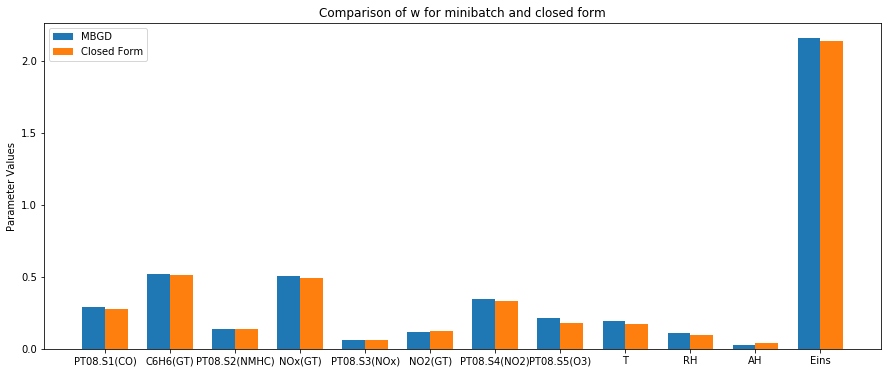

In [21]:
# From the code above optimal parameters were found to be: (lr and alpha are round to 3d.p.)
opt_pars = {'lr': 0.006, 'alpha': 0.008, 'batch_size': 512}

w, _ = MBGD(X, y, train_size=1, **opt_pars)
validate_model(test, train, w)

# Comparing the weights and alpha:

# Plot the bar chart for absolute values of parameters:
labels = X.columns
x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(x - width/2, np.abs(w), width, label='MBGD')
rects2 = ax.bar(x + width/2, np.abs(w_closed), width, label='Closed Form')

ax.set_ylabel('Parameter Values')
ax.set_title('Comparison of w for minibatch and closed form')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

print(f'\nMean value for the minibatch parameters is {np.mean(w):.4} and for closed form is {np.mean(w_closed):.4}')
print(f"The optimal alpha parameter for the minibatch is {opt_pars['alpha']:.3} and for closed form is {opt_alpha:.2}")

In [22]:
# Testing the model without regularization:
opt_pars['alpha'] = 0
w, _ = MBGD(X, y, train_size=1, **opt_pars)
validate_model(test, train, w)

Mean squared error for the test data is 0.2191
Mean absolute error for the test data is 0.3032


The performance of the minibatch gradient descent is sligtly better on the test set for both regularised and non-regularised approaches, which suggests that the model was able to generalise better just because of the minibatch. The effect of regularization is also more positive showing slight improvement in performance. Again, those difference are insignificant and could be attributed to noise. 

The values for $\mathbf{w}$ are very simillar for both models with MBGD having a slightly higher value on average. The $\alpha$ parameter on the other hand is very different between the two models. This is likely because of the difference in frequency and scale of updates, where in closed form we peform it in a single calculation but with minibatch it is done over numerous steps and thus requires less radical regularization.